# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

# Loading Dataset

In [2]:
data=pd.read_csv("bird.csv",index_col="id")
data.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
id,,,,,,,,,,,
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


# Basic Description of the Dataset

## Shape of Dataset

In [3]:
data.shape

(420, 11)

In [4]:
data.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    419 non-null    float64
 1   humw    419 non-null    float64
 2   ulnal   417 non-null    float64
 3   ulnaw   418 non-null    float64
 4   feml    418 non-null    float64
 5   femw    419 non-null    float64
 6   tibl    418 non-null    float64
 7   tibw    419 non-null    float64
 8   tarl    419 non-null    float64
 9   tarw    419 non-null    float64
 10  type    420 non-null    object 
dtypes: float64(10), object(1)
memory usage: 39.4+ KB


## Checking null values in the dataset

In [3]:
data.isnull().sum()

huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

# Cleaning of Data

## Dropping Null Values

In [4]:
data.dropna(inplace=True)
data.shape

(413, 11)

# Basic Data Visualization 

## Barplot showing the average length of humerus of every cateogary of bird 

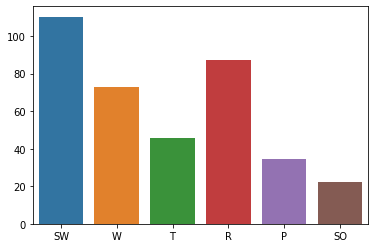

In [19]:
SW=np.mean(data.huml[data.type=="SW"])
W=np.mean(data.huml[data.type=="W"])
T=np.mean(data.huml[data.type=="T"])
R=np.mean(data.huml[data.type=="R"])
P=np.mean(data.huml[data.type=="P"])
SO=np.mean(data.huml[data.type=="SO"])
sns.barplot(["SW","W","T","R","P","SO"],[SW,W,T,R,P,SO])

## Pie chart showing the average diameter of humerus of every cateogary of bird

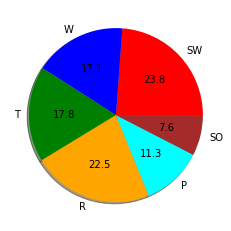

In [18]:
SW=np.mean(data.humw[data.type=="SW"])
W=np.mean(data.humw[data.type=="W"])
T=np.mean(data.humw[data.type=="T"])
R=np.mean(data.humw[data.type=="R"])
P=np.mean(data.humw[data.type=="P"])
SO=np.mean(data.humw[data.type=="SO"])
mat.pie([SW,W,T,R,P,SO],labels=["SW","W","T","R","P","SO"],colors=["red","blue","green","orange","cyan","brown"],autopct="%1.1f",startangle=0,shadow=True)
mat.show()

## Pair Plot showing realtionship between various features

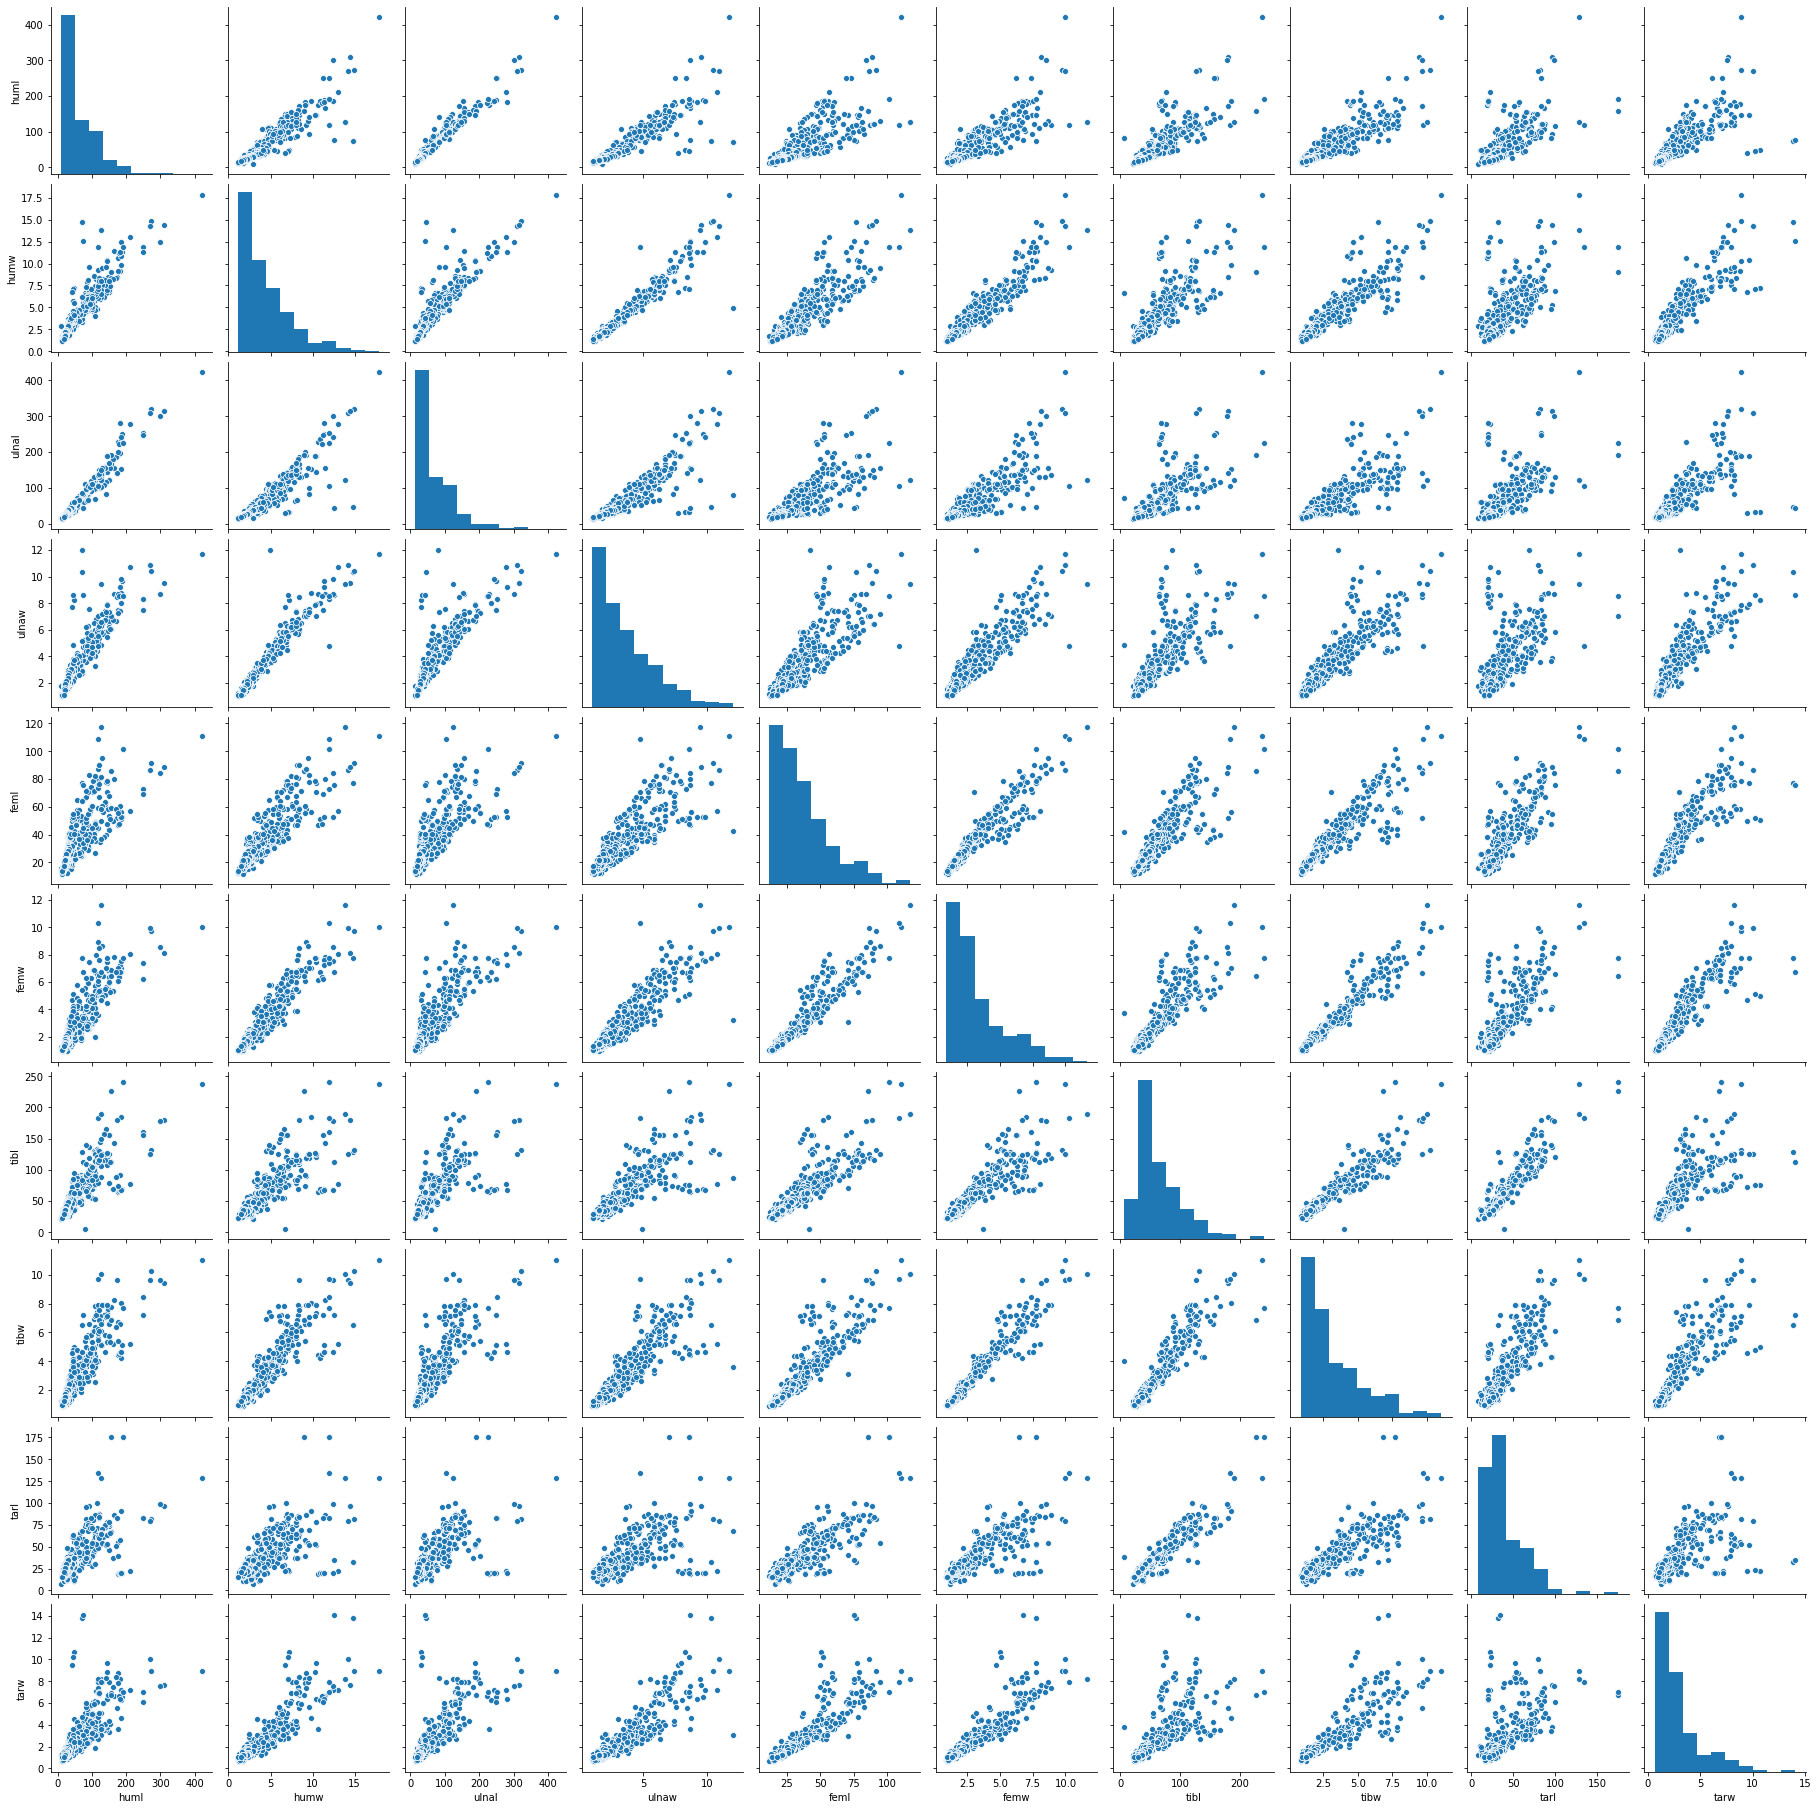

In [21]:
sns.pairplot(data)

# Heatmap showing corelation value of various attributes

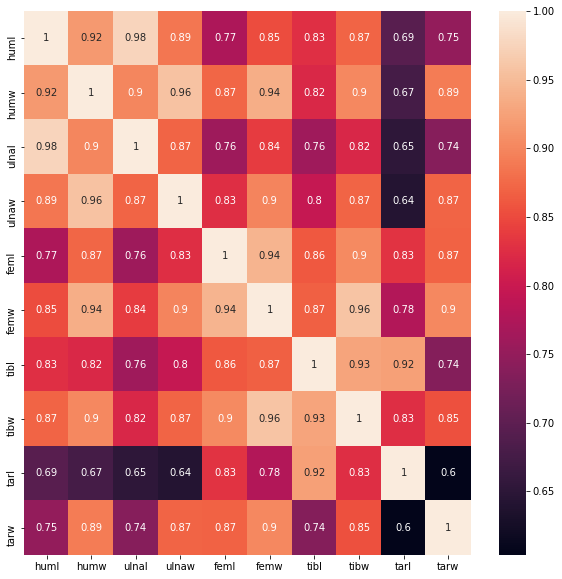

In [4]:
mat.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

# Clustering on data

In [4]:
from sklearn.cluster import KMeans

In [5]:
cluster=KMeans(n_clusters=3)
result=cluster.fit_predict(data.loc[:,"huml":"tarw"])

In [6]:
data["target"]=result
data.head(5)

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type,target
id,,,,,,,,,,,,
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW,1
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW,2
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW,2
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW,2
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW,1


In [7]:
df0=

{0, 1, 2}

# Splitting data into dependent and independent variables

In [5]:
x=data.loc[:,"huml":"tarw"]
y=data["type"]

# Dividing data into train and test data

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

# Machine learning Model

## Logistic Regression Model

In [63]:
from sklearn.linear_model import LogisticRegression

### HyperParameter Tuning for ideal value of C

In [84]:
c_range=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
acc=[]
test=[]
for i in c_range:
    model=LogisticRegression(C=i,max_iter=1000)
    model.fit(x_train,y_train)
    ytrain_pred=model.predict(x_train)
    acc.append(accuracy_score(y_train,ytrain_pred))
    y_pred=model.predict(x_test)
    test.append(accuracy_score(y_test,y_pred))

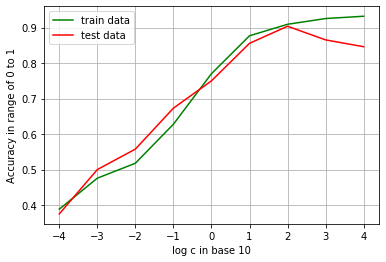

In [85]:
mat.plot([-4,-3,-2,-1,0,1,2,3,4],acc,color="green",label="train data")
mat.plot([-4,-3,-2,-1,0,1,2,3,4],test,color="red",label="test data")
mat.grid()
mat.xlabel("log c in base 10")
mat.ylabel("Accuracy in range of 0 to 1")
mat.legend()
mat.show()

### GridSearch for fiding ideal values of arguments

In [71]:
from sklearn.model_selection import GridSearchCV
X=ss.fit_transform(x)
find=GridSearchCV(LogisticRegression(max_iter=10000),{"C":[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]},cv=5,return_train_score=False)
find.fit(X,y)
result=pd.DataFrame(find.cv_results_)
result=result[["params","mean_test_score"]]
result

,params,mean_test_score
0,{'C': 0.0001},0.418425
1,{'C': 0.001},0.488833
2,{'C': 0.01},0.527593
3,{'C': 0.1},0.607817
4,{'C': 1},0.690391
5,{'C': 10},0.758125
6,{'C': 100},0.772612
7,{'C': 1000},0.765442
8,{'C': 10000},0.763003


In [72]:
find.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model training

In [64]:
model=LogisticRegression(C=100,max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy on traiining data

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
ytrain_pred=model.predict(x_train)
train_accuracy=accuracy_score(y_train,ytrain_pred)
train_accuracy

0.9093851132686084

### Accuracy on test data

In [66]:
y_pred=model.predict(x_test)
y_pred

array(['SO', 'SO', 'SW', 'SO', 'SO', 'SO', 'W', 'SW', 'SW', 'P', 'SO',
       'SW', 'R', 'T', 'SO', 'SW', 'P', 'W', 'SW', 'T', 'SO', 'SW', 'SO',
       'SO', 'W', 'P', 'T', 'SO', 'SO', 'SO', 'SO', 'R', 'SW', 'SW', 'SO',
       'SO', 'SO', 'W', 'SW', 'P', 'SO', 'SW', 'P', 'SO', 'SO', 'W', 'R',
       'SO', 'SW', 'SO', 'SO', 'SW', 'SW', 'SO', 'SO', 'R', 'P', 'W', 'R',
       'P', 'T', 'SW', 'W', 'R', 'W', 'T', 'SW', 'SW', 'SW', 'SW', 'SW',
       'SW', 'R', 'SO', 'W', 'R', 'T', 'W', 'SO', 'SW', 'SW', 'SW', 'SW',
       'SO', 'SW', 'SO', 'W', 'SW', 'SO', 'SW', 'R', 'SW', 'SW', 'W',
       'SO', 'R', 'SO', 'R', 'W', 'SO', 'SO', 'P', 'R', 'SO'],
      dtype=object)

In [81]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 8,  0,  1,  0,  0,  0],
       [ 0, 11,  0,  1,  0,  0],
       [ 0,  0, 30,  0,  0,  0],
       [ 0,  0,  2, 28,  1,  1],
       [ 0,  0,  0,  0,  5,  0],
       [ 0,  1,  2,  1,  0, 12]], dtype=int64)

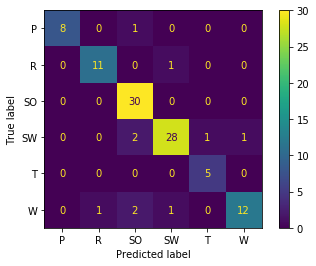

In [67]:
plot_confusion_matrix(model,x_test,y_test)

In [68]:
test_accuracy=accuracy_score(y_test,y_pred)
test_accuracy

0.9038461538461539

In [69]:
print(f"train data accuracy:{train_accuracy}\ntest data accuracy:{test_accuracy}")

train data accuracy:0.9093851132686084
test data accuracy:0.9038461538461539


### output on random data

In [70]:
xout=[[80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84]]
y_pred=model.predict(xout)
y_pred

array(['SW'], dtype=object)

## SVC Model

In [12]:
from sklearn.svm import SVC

### Hyperparameter tuning for finding ideal value of C

In [88]:
c_range=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
train,test=[],[]
for i in c_range:
    model=SVC(C=i)
    model.fit(x_train,y_train)
    ytrain_pred=model.predict(x_train)
    train.append(accuracy_score(y_train,ytrain_pred))
    y_pred=model.predict(x_test)
    test.append(accuracy_score(y_test,y_pred))


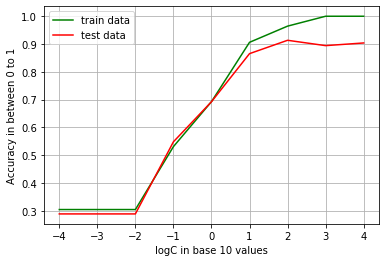

In [89]:
mat.plot([-4,-3,-2,-1,0,1,2,3,4],train,color="green",label="train data")
mat.plot([-4,-3,-2,-1,0,1,2,3,4],test,color="red",label="test data")
mat.grid()
mat.xlabel("logC in base 10 values")
mat.ylabel("Accuracy in between 0 to 1")
mat.legend()
mat.show()

### Grid Search to find ideal value of arguments

In [17]:
from sklearn.model_selection import GridSearchCV
X=ss.fit_transform(x)
finder=GridSearchCV(SVC(),{"C":[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],"kernel":["rbf","linear"]},cv=5,return_train_score=False)
finder.fit(X,y)
result=pd.DataFrame(finder.cv_results_)

In [15]:
result=result[["params","mean_test_score"]]
result

,params,mean_test_score
0,"{'C': 0.0001, 'kernel': 'rbf'}",0.300235
1,"{'C': 0.0001, 'kernel': 'linear'}",0.300235
2,"{'C': 0.001, 'kernel': 'rbf'}",0.300235
3,"{'C': 0.001, 'kernel': 'linear'}",0.437849
4,"{'C': 0.01, 'kernel': 'rbf'}",0.300235
5,"{'C': 0.01, 'kernel': 'linear'}",0.517984
6,"{'C': 0.1, 'kernel': 'rbf'}",0.522921
7,"{'C': 0.1, 'kernel': 'linear'}",0.614957
8,"{'C': 1, 'kernel': 'rbf'}",0.644049
9,"{'C': 1, 'kernel': 'linear'}",0.721804


In [77]:
finder.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Training of model

In [50]:
model=SVC(C=100,kernel="linear")
model.fit(x_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Accuracy on train data

In [51]:
ytrain_pred=model.predict(x_train)
train_accuracy=accuracy_score(y_train,ytrain_pred)
train_accuracy

0.9644012944983819

### Confusion matrix on test data

In [52]:
ytest_pred=model.predict(x_test)
cm=confusion_matrix(y_test,ytest_pred)
cm

array([[ 8,  0,  0,  0,  0,  1],
       [ 0, 11,  0,  1,  0,  0],
       [ 0,  0, 30,  0,  0,  0],
       [ 0,  0,  2, 28,  1,  1],
       [ 1,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  1,  0, 15]], dtype=int64)

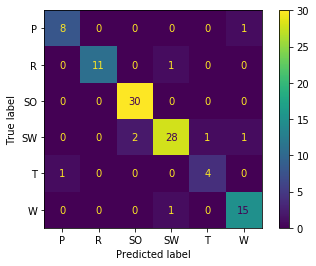

In [53]:
plot_confusion_matrix(model,x_test,y_test)

### Accuracy on test data

In [54]:
test_accuracy=accuracy_score(y_test,ytest_pred)
test_accuracy

0.9230769230769231

In [55]:
print(f"train data accuracy:{train_accuracy}\ntest data accuracy:{test_accuracy}")

train data accuracy:0.9644012944983819
test data accuracy:0.9230769230769231


### Output on random data

In [56]:
xout=[[80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84]]
y_pred=model.predict(xout)
y_pred

array(['R'], dtype=object)

## KNN Clustering Algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier


### Hyperparameter tuning to find ideal value of number of nearest neighbours

In [91]:
n_range=range(1,10)
test,train=[],[]
for i in n_range:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    ytrain_pred=model.predict(x_train)
    train.append(accuracy_score(y_train,ytrain_pred))
    ytest_pred=model.predict(x_test)
    test.append(accuracy_score(y_test,ytest_pred))

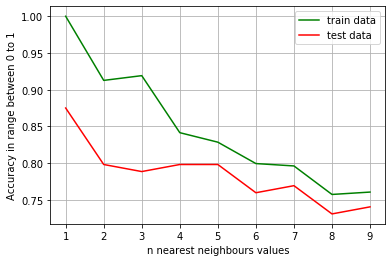

In [92]:
mat.plot(n_range,train,color="green",label="train data")
mat.plot(n_range,test,color="red",label="test data")
mat.grid()
mat.xlabel("n nearest neighbours values")
mat.ylabel("Accuracy in range between 0 to 1")
mat.legend()
mat.show()

### Grid Search to find ideal values of arguments

In [29]:
from sklearn.model_selection import GridSearchCV
X=ss.fit_transform(x)
tuning=GridSearchCV(KNeighborsClassifier(),{"n_neighbors":list(range(1,10)),"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],"p":[1,2,3]},scoring="accuracy",cv=5,return_train_score=False)
tuning.fit(X,y)
result=pd.DataFrame(tuning.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004197,9.786252e-04,0.010394,0.000489,auto,1,1,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}",0.530120,0.722892,0.686747,0.670732,0.780488,0.678196,0.083086,21
1,0.006791,6.613884e-03,0.010594,0.001019,auto,1,2,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}",0.554217,0.722892,0.674699,0.695122,0.768293,0.683044,0.071648,13
2,0.002597,7.976066e-04,0.015392,0.001623,auto,1,3,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 3}",0.566265,0.746988,0.686747,0.707317,0.792683,0.700000,0.076042,1
3,0.002798,7.475512e-04,0.007995,0.001414,auto,2,1,"{'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}",0.493976,0.650602,0.662651,0.670732,0.731707,0.641934,0.079101,93
4,0.002598,4.884807e-04,0.009594,0.000800,auto,2,2,"{'algorithm': 'auto', 'n_neighbors': 2, 'p': 2}",0.530120,0.674699,0.674699,0.719512,0.743902,0.668587,0.074180,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.002199,7.480226e-04,0.011193,0.001468,brute,8,2,"{'algorithm': 'brute', 'n_neighbors': 8, 'p': 2}",0.530120,0.638554,0.602410,0.731707,0.731707,0.646900,0.077551,69
104,0.002399,4.898636e-04,0.035580,0.001496,brute,8,3,"{'algorithm': 'brute', 'n_neighbors': 8, 'p': 3}",0.518072,0.650602,0.626506,0.707317,0.719512,0.644402,0.071997,81
105,0.001799,4.000666e-04,0.010223,0.001652,brute,9,1,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1}",0.493976,0.698795,0.602410,0.707317,0.682927,0.637085,0.080653,97
106,0.002198,3.989936e-04,0.010993,0.003160,brute,9,2,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}",0.506024,0.650602,0.626506,0.743902,0.707317,0.646870,0.081652,73


In [31]:
result=result[["params","mean_test_score"]]
result

,params,mean_test_score
0,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}",0.678196
1,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}",0.683044
2,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 3}",0.700000
3,"{'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}",0.641934
4,"{'algorithm': 'auto', 'n_neighbors': 2, 'p': 2}",0.668587
...,...,...
103,"{'algorithm': 'brute', 'n_neighbors': 8, 'p': 2}",0.646900
104,"{'algorithm': 'brute', 'n_neighbors': 8, 'p': 3}",0.644402
105,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1}",0.637085
106,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}",0.646870


In [32]:
tuning.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=3,
                     weights='uniform')

### Model Traning

In [23]:
model=KNeighborsClassifier(n_neighbors=1,p=3)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=3,
                     weights='uniform')

### Accuracy on train data 

In [24]:
ytrain_pred=model.predict(x_train)
train_accuracy=accuracy_score(y_train,ytrain_pred)
train_accuracy

1.0

### Confusion matrix on test data

In [25]:
ytest_pred=model.predict(x_test)
cm=confusion_matrix(y_test,ytest_pred)
cm

array([[ 9,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 2,  0, 28,  0,  0,  0],
       [ 0,  0,  2, 24,  2,  4],
       [ 1,  0,  0,  0,  4,  0],
       [ 0,  1,  1,  0,  0, 14]], dtype=int64)

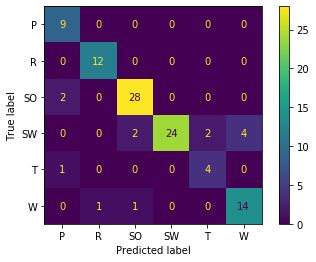

In [26]:
plot_confusion_matrix(model,x_test,y_test)

### Accuracy score on test data

In [27]:
test_accuracy=accuracy_score(y_test,ytest_pred)
test_accuracy

0.875

### Output on random data

In [28]:
xout=[80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84]
y_pred=model.predict([xout])
y_pred

array(['SW'], dtype=object)

## Naive Bayes Classifier

In [7]:
from sklearn.naive_bayes import GaussianNB

### HyperParameter tuning to find ideal value of var_smoothing in Naive Bayes

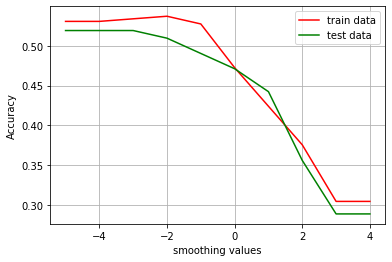

In [52]:
smoothing_range=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
train,test=[],[]
for i in smoothing_range:
    model=GaussianNB(var_smoothing=i)
    model.fit(x_train,y_train)
    ytrain_pred=model.predict(x_train)
    train.append(accuracy_score(y_train,ytrain_pred))
    ytest_pred=model.predict(x_test)
    test.append(accuracy_score(y_test,ytest_pred))
mat.plot([-5,-4,-3,-2,-1,0,1,2,3,4],train,color="red",label="train data")
mat.plot([-5,-4,-3,-2,-1,0,1,2,3,4],test,color="green",label="test data")
mat.grid()
mat.xlabel("smoothing values")
mat.ylabel("Accuracy")
mat.legend()
mat.show()

In [41]:
from sklearn.model_selection import GridSearchCV
X=ss.fit_transform(x)
tuning=GridSearchCV(GaussianNB(),{"var_smoothing":np.logspace(1,-9,num=100)},cv=5,return_train_score=False)
tuning.fit(X,y)
result=pd.DataFrame(tuning.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003398,0.000490,0.001599,4.896945e-04,10,{'var_smoothing': 10.0},0.493976,0.554217,0.433735,0.353659,0.329268,0.432971,0.084223,100
1,0.002999,0.001548,0.001599,4.906802e-04,7.92483,{'var_smoothing': 7.924828983539173},0.493976,0.554217,0.433735,0.353659,0.341463,0.435410,0.081311,98
2,0.002997,0.000636,0.001800,3.995660e-04,6.28029,{'var_smoothing': 6.280291441834253},0.518072,0.530120,0.433735,0.353659,0.341463,0.435410,0.079139,98
3,0.002598,0.000799,0.002599,1.199238e-03,4.97702,{'var_smoothing': 4.977023564332112},0.530120,0.566265,0.433735,0.353659,0.341463,0.445048,0.090709,97
4,0.004995,0.002003,0.001597,7.986021e-04,3.94421,{'var_smoothing': 3.944206059437656},0.554217,0.590361,0.433735,0.353659,0.341463,0.454687,0.101764,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.005997,0.005511,0.000999,1.507891e-07,2.53536e-09,{'var_smoothing': 2.535364493970117e-09},0.361446,0.566265,0.518072,0.524390,0.439024,0.481840,0.072909,8
96,0.003398,0.000490,0.001799,3.996377e-04,2.00923e-09,{'var_smoothing': 2.009233002565046e-09},0.361446,0.566265,0.518072,0.524390,0.439024,0.481840,0.072909,8
97,0.003198,0.000400,0.001399,4.894539e-04,1.59228e-09,{'var_smoothing': 1.5922827933410938e-09},0.361446,0.566265,0.518072,0.524390,0.439024,0.481840,0.072909,8
98,0.003199,0.000400,0.001199,3.994465e-04,1.26186e-09,{'var_smoothing': 1.2618568830660185e-09},0.361446,0.566265,0.518072,0.524390,0.439024,0.481840,0.072909,8


In [42]:
result=result[["params","mean_test_score"]]
result

,params,mean_test_score
0,{'var_smoothing': 10.0},0.432971
1,{'var_smoothing': 7.924828983539173},0.435410
2,{'var_smoothing': 6.280291441834253},0.435410
3,{'var_smoothing': 4.977023564332112},0.445048
4,{'var_smoothing': 3.944206059437656},0.454687
...,...,...
95,{'var_smoothing': 2.535364493970117e-09},0.481840
96,{'var_smoothing': 2.009233002565046e-09},0.481840
97,{'var_smoothing': 1.5922827933410938e-09},0.481840
98,{'var_smoothing': 1.2618568830660185e-09},0.481840


In [43]:
tuning.best_estimator_

GaussianNB(priors=None, var_smoothing=0.07564633275546291)

### Model Training

In [44]:
model=GaussianNB(var_smoothing=0.07564633275546291)
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=0.07564633275546291)

### Accuracy on train data

In [45]:
ytrain_pred=model.predict(x_train)
train_accuracy=accuracy_score(y_train,ytrain_pred)
train_accuracy

0.5275080906148867

### Confusion matrix on test data

In [46]:
ytest_pred=model.predict(x_test)
cm=confusion_matrix(y_test,ytest_pred)
cm

array([[ 1,  0,  8,  0,  0,  0],
       [ 1,  7,  1,  3,  0,  0],
       [ 2,  0, 28,  0,  0,  0],
       [ 3,  7,  4, 10,  0,  8],
       [ 3,  0,  2,  0,  0,  0],
       [ 2,  5,  3,  1,  0,  5]], dtype=int64)

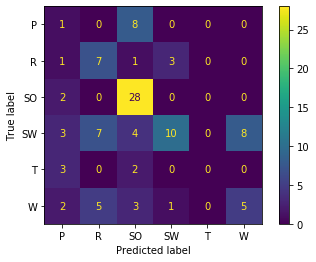

In [47]:
plot_confusion_matrix(model,x_test,y_test)

In [48]:
test_accuracy=accuracy_score(y_test,ytest_pred)
test_accuracy

0.49038461538461536

## Decision Tree

In [9]:
from sklearn import tree

### HyperParameter Tuning of Decision Tree classifier

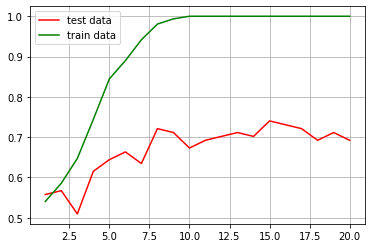

In [8]:
test,train=[],[]
depth=range(1,21)
for i in depth:
    model=tree.DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    ytrain_pred=model.predict(x_train)
    train.append(accuracy_score(y_train,ytrain_pred))
    ytest_pred=model.predict(x_test)
    test.append(accuracy_score(y_test,ytest_pred))
mat.plot(depth,test,color="red",label="test data")
mat.plot(depth,train,color="green",label="train data")
mat.legend()
mat.grid()
mat.show()

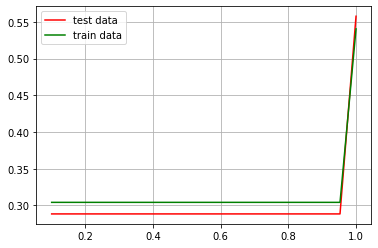

In [11]:
test,train=[],[]
split=list(np.linspace(0.1,1,num=20))
for i in split:
    model=tree.DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    ytrain_pred=model.predict(x_train)
    train.append(accuracy_score(y_train,ytrain_pred))
    ytest_pred=model.predict(x_test)
    test.append(accuracy_score(y_test,ytest_pred))
mat.plot(split,test,color="red",label="test data")
mat.plot(split,train,color="green",label="train data")
mat.legend()
mat.grid()
mat.show()

In [9]:
from sklearn.model_selection import GridSearchCV
tuning=GridSearchCV(tree.DecisionTreeClassifier(),{"criterion":["gini","entropy"],"splitter":["best","random"],"min_samples_split":list(np.linspace(0.1,1,num=20)),"max_depth":list(range(1,21))},cv=5,return_train_score=True)
X=ss.fit_transform(x)
tuning.fit(X,y)
result=pd.DataFrame(tuning.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031982,0.058967,0.003798,5.596805e-03,gini,1,0.1,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.530120,...,0.528005,0.034568,601,0.545455,0.515152,0.557576,0.543807,0.531722,0.538742,0.014361
1,0.005197,0.005416,0.000600,4.898626e-04,gini,1,0.1,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.542169,...,0.481575,0.095295,1435,0.463636,0.460606,0.460606,0.552870,0.438066,0.475157,0.039928
2,0.003138,0.000809,0.000400,4.896872e-04,gini,1,0.147368,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.530120,...,0.528005,0.034568,601,0.545455,0.515152,0.557576,0.543807,0.531722,0.538742,0.014361
3,0.003471,0.002932,0.000800,3.997804e-04,gini,1,0.147368,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.518072,...,0.535234,0.046166,490,0.469697,0.493939,0.539394,0.546828,0.468278,0.503627,0.033586
4,0.002999,0.000001,0.000999,3.504023e-07,gini,1,0.194737,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.530120,...,0.528005,0.034568,601,0.545455,0.515152,0.557576,0.543807,0.531722,0.538742,0.014361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.002000,0.001095,0.000799,3.996136e-04,entropy,20,0.905263,random,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.542169,...,0.496621,0.069334,1305,0.545455,0.390909,0.500000,0.534743,0.522659,0.498753,0.055999
1596,0.005396,0.001496,0.001000,8.662177e-07,entropy,20,0.952632,best,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.530120,...,0.527975,0.041068,740,0.554545,0.539394,0.566667,0.543807,0.540785,0.549040,0.010292
1597,0.004198,0.003485,0.000799,3.996611e-04,entropy,20,0.952632,random,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.518072,...,0.452571,0.057028,1557,0.512121,0.475758,0.421212,0.519637,0.459215,0.477589,0.036000
1598,0.005396,0.001855,0.001200,3.998529e-04,entropy,20,1,best,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.530120,...,0.527975,0.041068,740,0.554545,0.539394,0.566667,0.543807,0.540785,0.549040,0.010292


In [10]:
result=result[["params","mean_test_score","mean_train_score"]]
result

,params,mean_test_score,mean_train_score
0,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.528005,0.538742
1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.481575,0.475157
2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.528005,0.538742
3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.535234,0.503627
4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.528005,0.538742
...,...,...,...
1595,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.496621,0.498753
1596,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.527975,0.549040
1597,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.452571,0.477589
1598,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.527975,0.549040


In [11]:
tuning.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

### model training

In [16]:
model=tree.DecisionTreeClassifier(criterion="entropy",max_depth=12,min_samples_split=0.1,splitter="random")
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

### Accuracy on train data

In [17]:
ytrain_pred=model.predict(x_train)
train_accuracy=accuracy_score(y_train,ytrain_pred)
train_accuracy

0.6763754045307443

### Confusion matrix on test data

In [18]:
ytest_pred=model.predict(x_test)
y_test

id
381    SO
171     W
233     R
333    SO
339    SO
       ..
359    SO
390    SO
274     P
222     R
398    SO
Name: type, Length: 104, dtype: object

In [19]:
cm=confusion_matrix(y_test,ytest_pred)
cm

array([[ 3,  0,  3,  0,  2,  1],
       [ 1, 10,  1,  0,  0,  0],
       [ 6,  0, 22,  0,  2,  0],
       [ 3,  5,  1, 20,  1,  2],
       [ 0,  0,  5,  0,  0,  0],
       [ 0,  6,  3,  4,  2,  1]], dtype=int64)

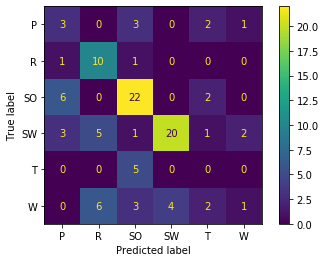

In [20]:
plot_confusion_matrix(model,x_test,y_test)

### Accuracy on test data

In [21]:
test_accuracy=accuracy_score(y_test,ytest_pred)
test_accuracy

0.5384615384615384

## Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter tuning to find ideal value of parameters

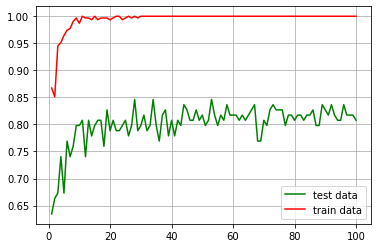

In [18]:
test,train=[],[]
estimators=list(range(1,101))
for i in estimators:
    model=RandomForestClassifier(n_estimators=i)
    model.fit(x_train,y_train)
    ytrain_pred=model.predict(x_train)
    train.append(accuracy_score(y_train,ytrain_pred))
    ytest_pred=model.predict(x_test)
    test.append(accuracy_score(y_test,ytest_pred))
mat.plot(estimators,test,color="green",label="test data")
mat.plot(estimators,train,color="red",label="train data")
mat.legend()
mat.grid()
mat.show()

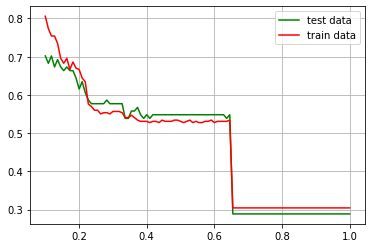

In [21]:
test,train=[],[]
split=np.linspace(0.1,1,num=100)
for i in split:
    model=RandomForestClassifier(min_samples_split=i)
    model.fit(x_train,y_train)
    ytrain_pred=model.predict(x_train)
    train.append(accuracy_score(y_train,ytrain_pred))
    ytest_pred=model.predict(x_test)
    test.append(accuracy_score(y_test,ytest_pred))
mat.plot(split,test,color="green",label="test data")
mat.plot(split,train,color="red",label="train data")
mat.legend()
mat.grid()
mat.show()

### Tuning using gridsearch

In [71]:
from sklearn.model_selection import GridSearchCV
tuning=GridSearchCV(RandomForestClassifier(),{"criterion":["gini","entropy"],"min_samples_split":[0.0001,0.001,0.01,0.1,10,100],"n_estimators":list(range(1,101))},cv=5)
X=ss.fit_transform(x)
tuning.fit(X,y)
result=pd.DataFrame(tuning.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007396,0.000490,0.001599,0.000490,gini,0.0001,1,"{'criterion': 'gini', 'min_samples_split': 0.0...",0.385542,0.602410,0.542169,0.634146,0.621951,0.557244,0.091487,992
1,0.014392,0.002869,0.002400,0.000801,gini,0.0001,2,"{'criterion': 'gini', 'min_samples_split': 0.0...",0.421687,0.530120,0.638554,0.646341,0.768293,0.600999,0.117158,936
2,0.015604,0.006194,0.001999,0.001265,gini,0.0001,3,"{'criterion': 'gini', 'min_samples_split': 0.0...",0.554217,0.686747,0.602410,0.695122,0.597561,0.627211,0.054734,740
3,0.009375,0.007654,0.000000,0.000000,gini,0.0001,4,"{'criterion': 'gini', 'min_samples_split': 0.0...",0.506024,0.626506,0.578313,0.634146,0.719512,0.612900,0.070173,852
4,0.031247,0.000002,0.000000,0.000000,gini,0.0001,5,"{'criterion': 'gini', 'min_samples_split': 0.0...",0.542169,0.614458,0.554217,0.621951,0.658537,0.598266,0.043687,954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.445979,0.043936,0.020987,0.006129,entropy,100,96,"{'criterion': 'entropy', 'min_samples_split': ...",0.530120,0.590361,0.445783,0.536585,0.597561,0.540082,0.054471,1052
1196,0.447944,0.106913,0.027785,0.012569,entropy,100,97,"{'criterion': 'entropy', 'min_samples_split': ...",0.530120,0.578313,0.457831,0.548780,0.597561,0.542521,0.048323,1028
1197,0.436580,0.068688,0.021817,0.006464,entropy,100,98,"{'criterion': 'entropy', 'min_samples_split': ...",0.530120,0.590361,0.445783,0.512195,0.585366,0.532765,0.053066,1143
1198,0.439809,0.064927,0.021790,0.006486,entropy,100,99,"{'criterion': 'entropy', 'min_samples_split': ...",0.530120,0.590361,0.433735,0.536585,0.585366,0.535234,0.056360,1107


In [72]:
tuning.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=33,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Model Training

In [73]:
model=RandomForestClassifier(min_samples_split=0.01,n_estimators=33)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=33,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###  accuracy on train data

In [74]:
ytrain_pred=model.predict(x_train)
train_accuracy=accuracy_score(y_train,ytrain_pred)
train_accuracy

0.9902912621359223

### Output on test data

In [75]:
ytest_pred=model.predict(x_test)
ytest_pred

array(['SO', 'SO', 'R', 'SO', 'SO', 'SO', 'W', 'SW', 'SW', 'P', 'SO',
       'SW', 'R', 'T', 'SO', 'SW', 'P', 'W', 'SW', 'P', 'SO', 'SW', 'SO',
       'SO', 'W', 'SO', 'T', 'P', 'SO', 'SO', 'SO', 'R', 'SW', 'SW', 'T',
       'SO', 'SO', 'W', 'W', 'P', 'SO', 'SW', 'P', 'SO', 'SO', 'W', 'R',
       'SO', 'SW', 'SO', 'SO', 'SW', 'SW', 'SO', 'SO', 'R', 'W', 'W', 'R',
       'P', 'SO', 'W', 'W', 'P', 'W', 'P', 'SW', 'SW', 'SW', 'SW', 'T',
       'SW', 'R', 'SO', 'W', 'R', 'R', 'W', 'SO', 'SW', 'W', 'SW', 'SW',
       'SO', 'SW', 'SO', 'W', 'SW', 'P', 'SW', 'R', 'SW', 'SW', 'W', 'SO',
       'W', 'SO', 'R', 'W', 'SO', 'SO', 'P', 'R', 'SO'], dtype=object)

### Confusion Matrix for test data

In [76]:
cm=confusion_matrix(y_test,ytest_pred)
cm

array([[ 7,  0,  1,  0,  0,  1],
       [ 0, 11,  0,  0,  0,  1],
       [ 1,  0, 28,  0,  1,  0],
       [ 0,  1,  2, 25,  0,  4],
       [ 2,  0,  1,  0,  2,  0],
       [ 1,  0,  2,  0,  1, 12]], dtype=int64)

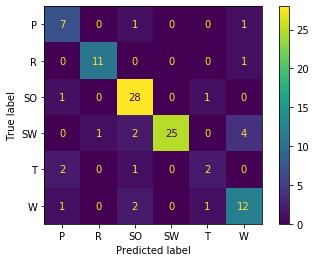

In [77]:
plot_confusion_matrix(model,x_test,y_test)

### Accuracy on test data

In [78]:
test_accuracy=accuracy_score(y_test,ytest_pred)
test_accuracy

0.8173076923076923